In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
datafolder='Activity_Recognition_from Single_Chest-Mounted_Accelerometer/'
person={}
for i in range(15):
    person[i+1]= pd.read_csv(datafolder+str(i+1)+'.csv',index_col=0,names=['seq num', 'ax', 'ay', 'az', 'label']) 

In [3]:
for i in person:
    print(i,'shape:',person[i].shape)#,'columns:',person[i].columns)

1 shape: (162501, 4)
2 shape: (138001, 4)
3 shape: (102341, 4)
4 shape: (122201, 4)
5 shape: (160001, 4)
6 shape: (140901, 4)
7 shape: (163001, 4)
8 shape: (138001, 4)
9 shape: (166741, 4)
10 shape: (126801, 4)
11 shape: (104451, 4)
12 shape: (114702, 4)
13 shape: (67651, 4)
14 shape: (116101, 4)
15 shape: (103501, 4)


In [4]:
person[1].head()

,ax,ay,az,label
seq num,,,,
0.0,1502,2215,2153,1
1.0,1667,2072,2047,1
2.0,1611,1957,1906,1
3.0,1601,1939,1831,1
4.0,1643,1965,1879,1


In [5]:
class_dict={}
class_dict[1]='Working at Computer'
class_dict[2]='Standing Up, Walking and Going Up/Down stairs' 
class_dict[3]='Standing'
class_dict[4]='Walking'
class_dict[5]='Going Up/Down Stairs'
class_dict[6]='Walking and Talking with Someone'
class_dict[7]='Talking while Standing'

In [6]:
def plot_data(folder='raw'):
    os.system('mkdir -p plots/'+folder)
    for i in person:

        fig, ax = plt.subplots(4,1, figsize=(6.4*1.5,4.8*1.5),sharex='col') 

        ax[0].plot(person[i]['ax'])
        ax[0].set_ylabel('ax')

        ax[1].plot(person[i]['ay'])
        ax[1].set_ylabel('ay')

        ax[2].plot(person[i]['az'])
        ax[2].set_ylabel('az')

        ax[3].plot(person[i]['label'])
        ax[3].set_ylabel('label')

        fig.suptitle('person '+str(i))

        fig.savefig('plots/'+folder+'/'+'person'+str(i))
        
def normalize_data(dataset):
    dataset = dataset - dataset.mean()
    dataset = dataset/dataset.std()
    return dataset

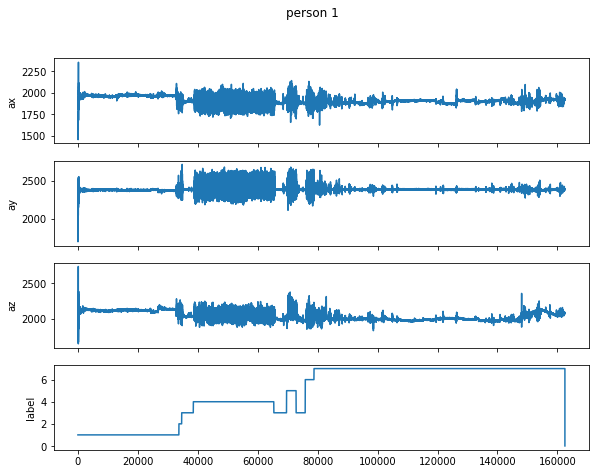

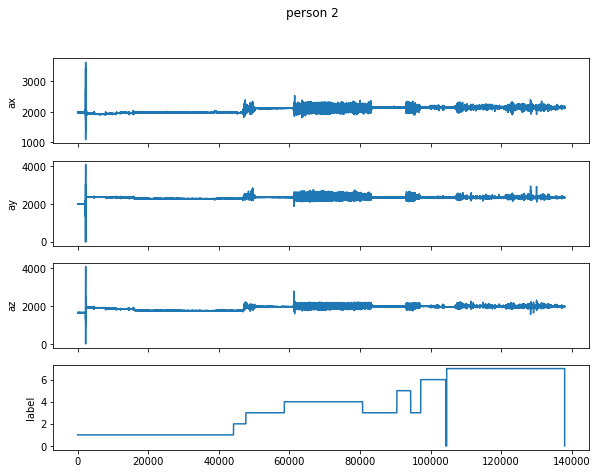

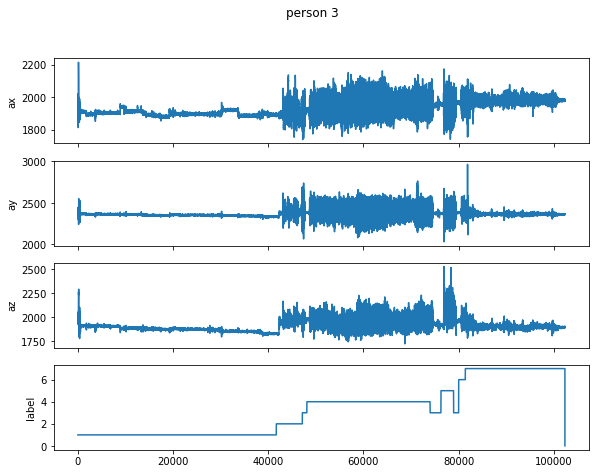

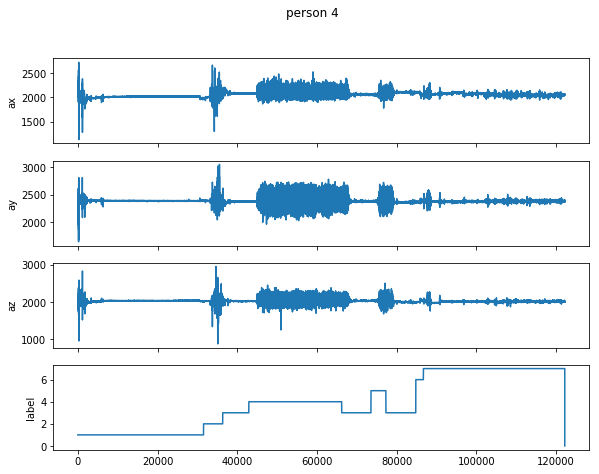

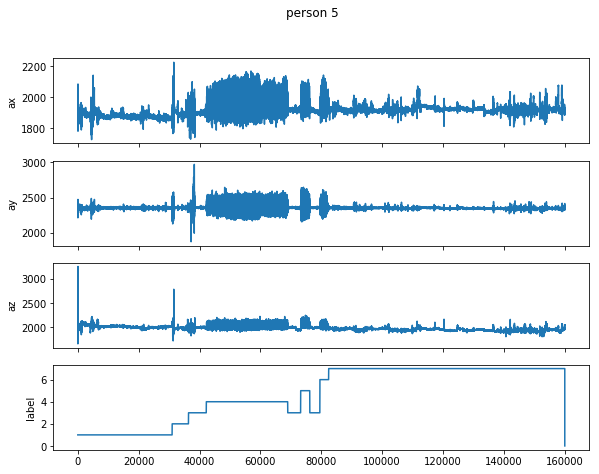

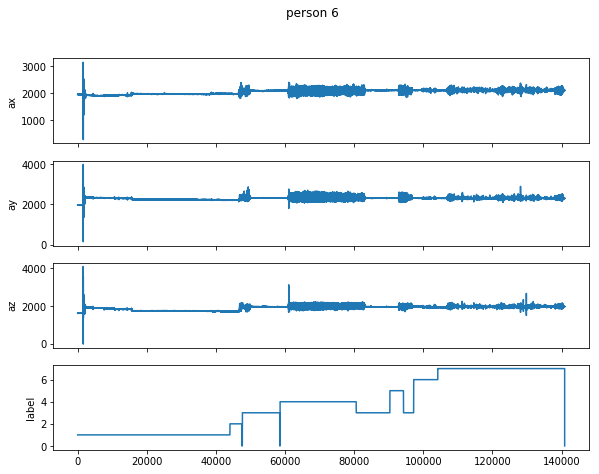

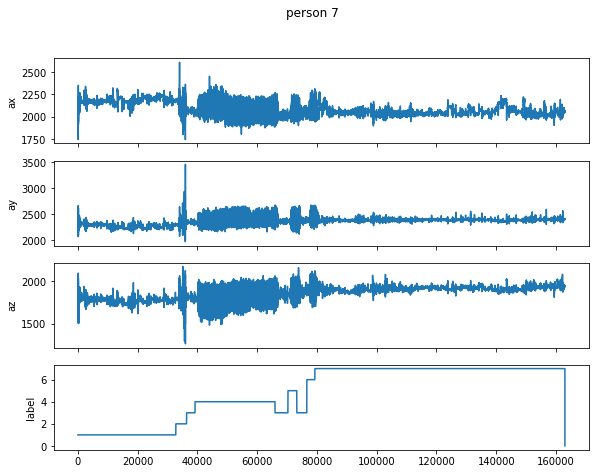

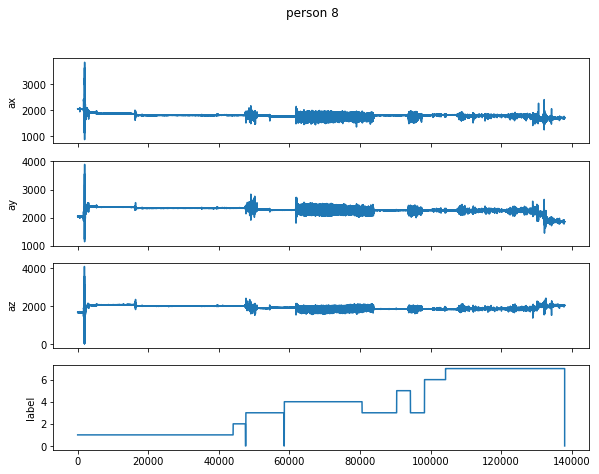

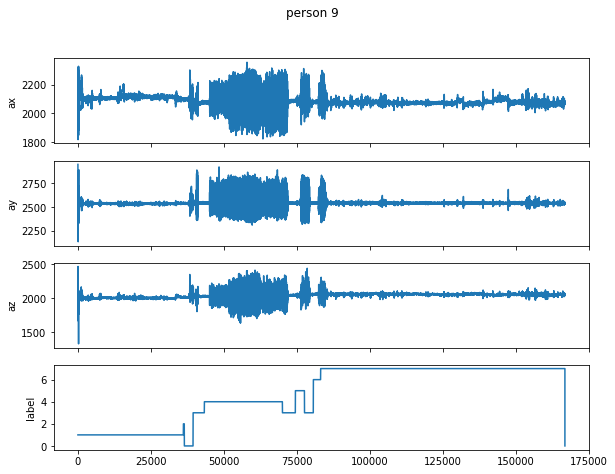

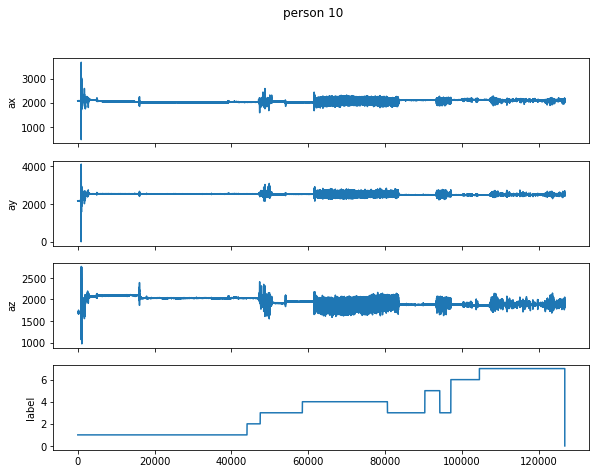

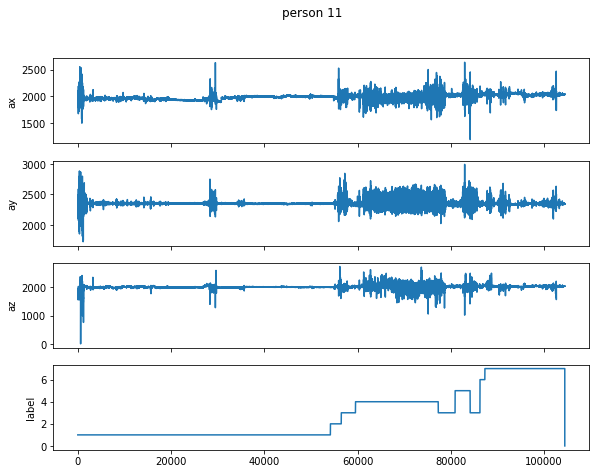

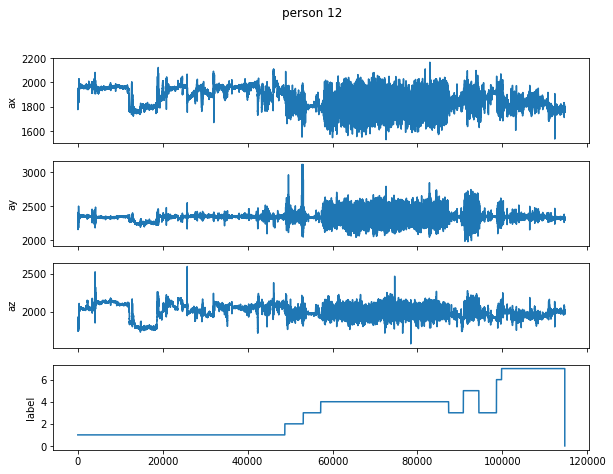

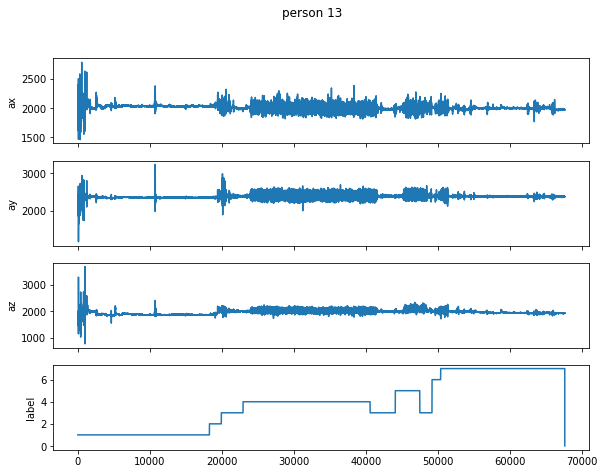

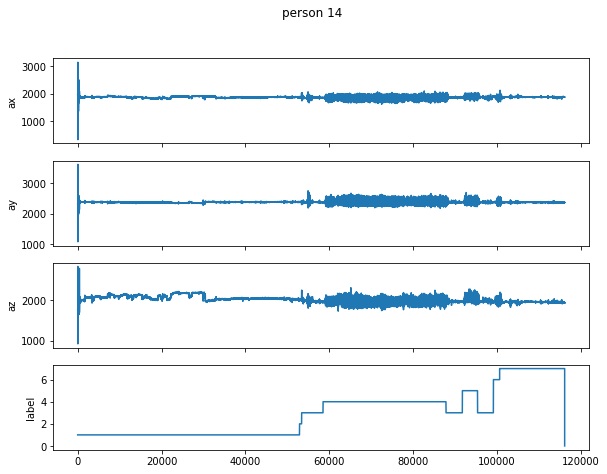

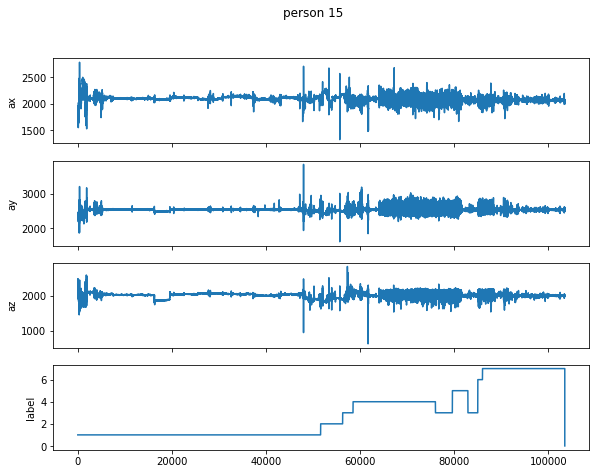

In [8]:
plot_data('raw')

In [9]:
for i in person: 
    for col in ['ax','ay','az']:
        person[i][col] = normalize_data(person[i][col])
plot_data('normalized')

In [ ]:
# how can I use the 52 Hz sampling rate?
# I want to add distance feature
# maybe focus on constructing the whole pipeline?

In [ ]:
rolltime_1 = 13 
rolltime_2 = 52 
rolltime_3 = 52 * 5
saveFolder = 'rolling'
os.system('mkdir -p plots/'+saveFolder+'/')
for i in person:
    fig, ax = plt.subplots(4,1, figsize=(6.4*2,4.8*3),sharex='col') 

    ax[0].plot(person[i]['ax'],label='raw')
    ax[0].plot(person[i].rolling(rolltime_1).mean()['ax'],label='roll_'+str(rolltime_1))
    ax[0].plot(person[i].rolling(rolltime_2).mean()['ax'],label='roll_'+str(rolltime_2))
    ax[0].plot(person[i].rolling(rolltime_3).mean()['ax'],label='roll_'+str(rolltime_3))
    ax[0].legend()
    ax[0].set_ylabel('ax')

    ax[1].plot(person[i]['ay'],label='raw')
    ax[1].plot(person[i].rolling(rolltime_1).mean()['ay'],label='roll_'+str(rolltime_1))
    ax[1].plot(person[i].rolling(rolltime_2).mean()['ay'],label='roll_'+str(rolltime_2))
    ax[1].plot(person[i].rolling(rolltime_3).mean()['ay'],label='roll_'+str(rolltime_3))
    ax[1].legend()
    ax[1].set_ylabel('ay')

    ax[2].plot(person[i]['az'],label='raw')
    ax[2].plot(person[i].rolling(rolltime_1).mean()['az'],label='roll_'+str(rolltime_1))
    ax[2].plot(person[i].rolling(rolltime_2).mean()['az'],label='roll_'+str(rolltime_2))
    ax[2].plot(person[i].rolling(rolltime_3).mean()['az'],label='roll_'+str(rolltime_3))
    ax[2].legend()
    ax[2].set_ylabel('az')

    ax[3].plot(person[i]['label'])
    ax[3].set_ylabel('label')
    
    
    fig.suptitle('person '+str(i))
        
    fig.savefig('plots/'+saveFolder+'/'+'person'+str(i)+'_'+saveFolder)


In [ ]:
#separate data into classes 
#act := act[class type][person number]
act = {}
for i in range(1,8):
    act[i] = {}
    for j in person:
        act[i][j] = person[j][person[j]['label']==i]

In [ ]:
for c in range(1,8):

    for i in person:

        fig, ax = plt.subplots(3,1, figsize=(6.4*2,4.8*1.5),sharex='col') 

        ax[0].plot(act[c][i]['ax'])
        ax[0].set_ylabel('ax')

        ax[1].plot(act[c][i]['ay'])
        ax[1].set_ylabel('ay')

        ax[2].plot(act[c][i]['az'])
        ax[2].set_ylabel('az')
        
        fig.suptitle('person '+str(i)+': '+class_dict[c])

        fig.savefig('plots/uncalib/'+'act_'+str(c)+'_person '+str(i))
        
        if c > 2:
            fig.clf()
                


In [ ]:
act[1][1].rolling(52).mean()['ax'].plot()

In [ ]:
for i in range(1,8):
    for j in person:
        act[i][j]['ax_norm'] = act[i][j]['ax'] - act[i][j]['ax'].mean() 
        act[i][j]['ay_norm'] = act[i][j]['ay'] - act[i][j]['ay'].mean() 
        act[i][j]['az_norm'] = act[i][j]['az'] - act[i][j]['az'].mean() 

for c in range(1,8):

    for i in person:

        fig, ax = plt.subplots(3,1, figsize=(6.4*2,4.8*1.5),sharex='col') 

        ax[0].plot(act[c][i]['ax_calib'] / act[c][i]['ax_calib'].std() )
        ax[0].set_ylabel('ax (calibrated)')

        ax[1].plot(act[c][i]['ay_calib'] / act[c][i]['ay_calib'].std() )
        ax[1].set_ylabel('ay (calibrated)')

        ax[2].plot(act[c][i]['az_calib'] / act[c][i]['az_calib'].std() )
        ax[2].set_ylabel('az (calibrated)')
        
        fig.suptitle('person '+str(i)+': '+class_dict[c])

        fig.savefig('plots/calib/'+'calib_act_'+str(c)+'_person '+str(i))
                
        if c > 2:
            fig.clf()


In [ ]:
for i in range(1,8):
    for j in person:
        act[i][j]['vx'] = act[i][j]['ax_calib'] * act[i][j].index
        act[i][j]['vy'] = act[i][j]['ay_calib'] * act[i][j].index
        act[i][j]['vz'] = act[i][j]['az_calib'] * act[i][j].index


for c in range(1,8):

    for i in person:

        fig, ax = plt.subplots(3,1, figsize=(6.4*2,4.8*1.5),sharex='col') 

        ax[0].plot(act[c][i]['vx'] / act[c][i]['vx'].std())
        ax[0].set_ylabel('vx')

        ax[1].plot(act[c][i]['vy'] / act[c][i]['vy'].std())
        ax[1].set_ylabel('vy')

        ax[2].plot(act[c][i]['vz'] / act[c][i]['vz'].std())
        ax[2].set_ylabel('vz')
        
        fig.suptitle('person '+str(i)+': '+class_dict[c])

        fig.savefig('plots/calib_v/'+'v_calib_act_'+str(c)+'_person '+str(i))

        if c > 2:
            fig.clf()
        

In [ ]:
for i in range(1,8):
    for j in person:
        act[i][j]['sx'] = act[i][j]['vx'] * act[i][j].index
        act[i][j]['sy'] = act[i][j]['vy'] * act[i][j].index
        act[i][j]['sz'] = act[i][j]['vz'] * act[i][j].index


for c in range(1,8):

    for i in person:

        fig, ax = plt.subplots(3,1, figsize=(6.4*2,4.8*1.5),sharex='col') 

        ax[0].plot(act[c][i]['sx'] / act[c][i]['sx'].std())
        ax[0].set_ylabel('sx')

        ax[1].plot(act[c][i]['sy'] / act[c][i]['sy'].std())
        ax[1].set_ylabel('sy')

        ax[2].plot(act[c][i]['sz'] / act[c][i]['sz'].std())
        ax[2].set_ylabel('sz')
        
        fig.suptitle('person '+str(i)+': '+class_dict[c])

        fig.savefig('plots/calib_s/'+'s_calib_act_'+str(c)+'_person '+str(i))
